In [22]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import scipy.fft 

os.chdir('/home/etienne/data/spikes')
spikes3=pd.read_csv('spikesrat3.csv')

In [2]:
import cv2
def window(spikes,delta):
    '''
    Entry: number of spikes per hour
           delta which is the number of time points chosen to average
           
    Return: the unweighted downsampled temporal network of new size (time points)/delta
    '''
    Filter=np.ones((delta,))/delta

    m=np.convolve(spikes,Filter,mode='valid')[::delta]
    return(m)

In [3]:
np.array(spikes3).shape

(1597, 1)

In [4]:
spikes=np.array(spikes3)[:,0]
delta=24

Filter=np.ones((delta,))/delta

spikespd=window(spikes,24)

<BarContainer object of 41 artists>

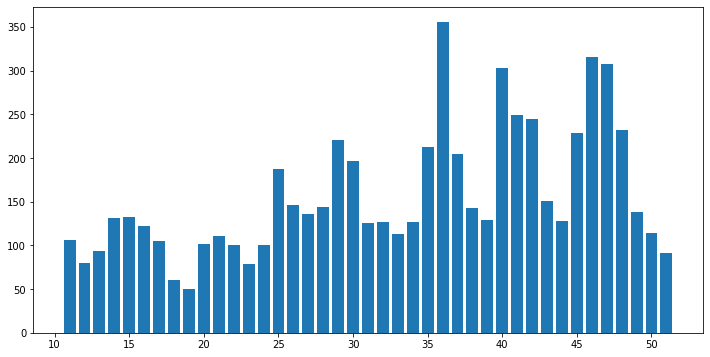

In [5]:
plt.figure(figsize=(12,6))
plt.bar(np.arange(11,len(spikespd)-14),spikespd[11:len(spikespd)-14])

In [48]:
(len(spikespd)-25)*24

984

In [6]:
signal=spikespd[11:len(spikespd)-14]

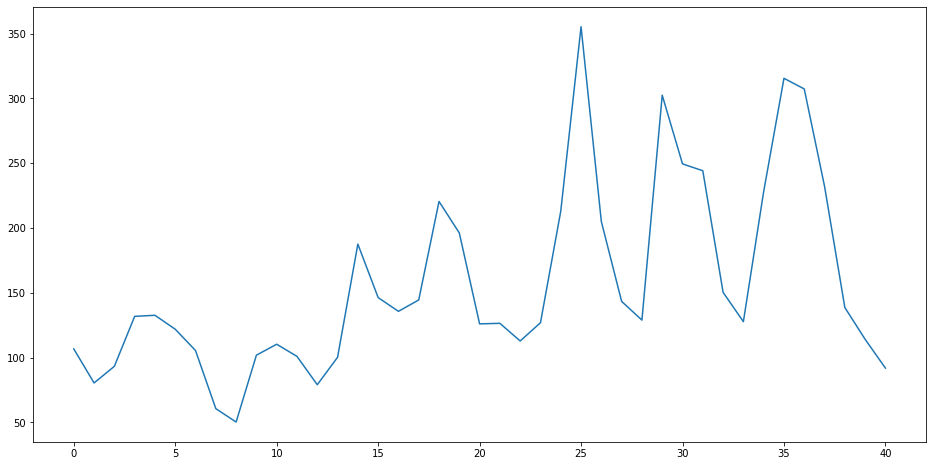

In [8]:
plt.figure(figsize=(16,8))
plt.plot(signal)

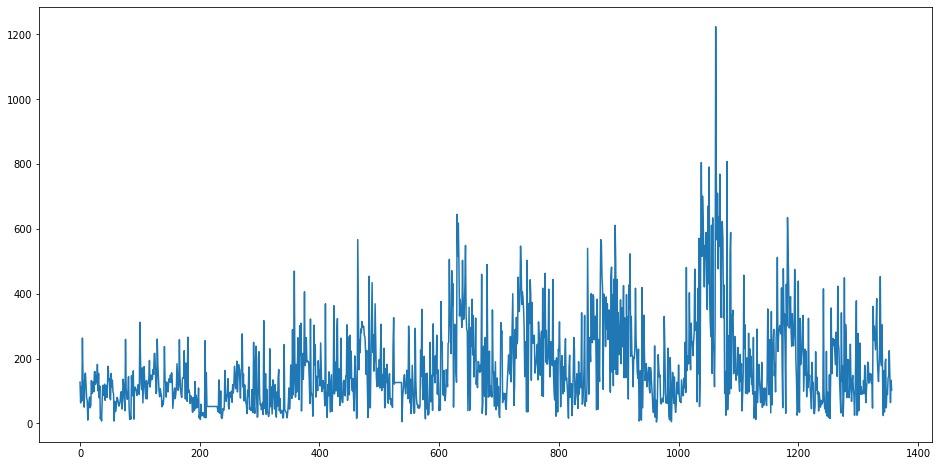

In [12]:
plt.figure(figsize=(16,8))
plt.plot(spikes[240:])

In [25]:
from scipy.fft import fft, fftfreq, fftshift
spikesf=spikes[240:]
DFT=fft(spikesf)

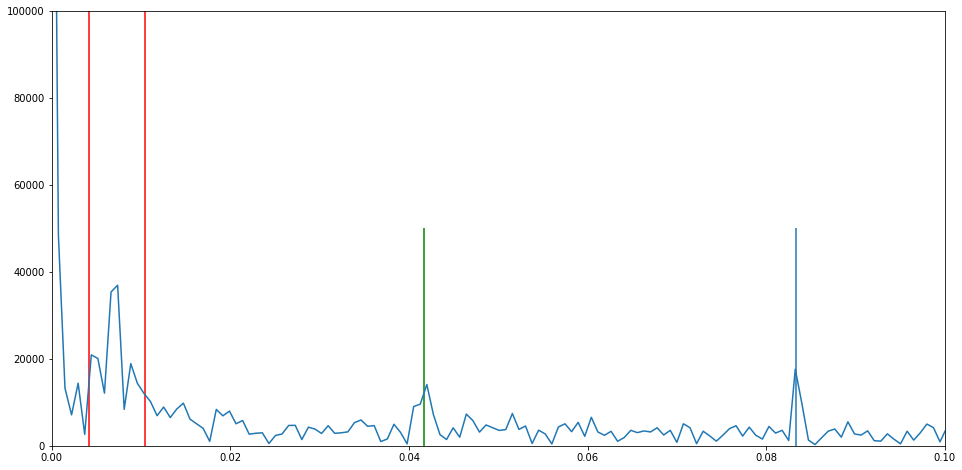

In [48]:
sp=fftshift(DFT)
freq = fftshift(fftfreq(spikesf.shape[-1]))

plt.figure(figsize=(16,8))
plt.plot(freq, np.sqrt((sp.imag)**2 +(sp.real)**2))
plt.xlim((0,0.1))
plt.ylim((0,100000))

plt.vlines(1/12,0,50000)
plt.vlines(1/24,0,50000,colors='g')

plt.vlines(1/(24*4),0,100000,colors='r')
plt.vlines(1/(24*10),0,100000,colors='r')


<Figure size 1152x576 with 0 Axes>

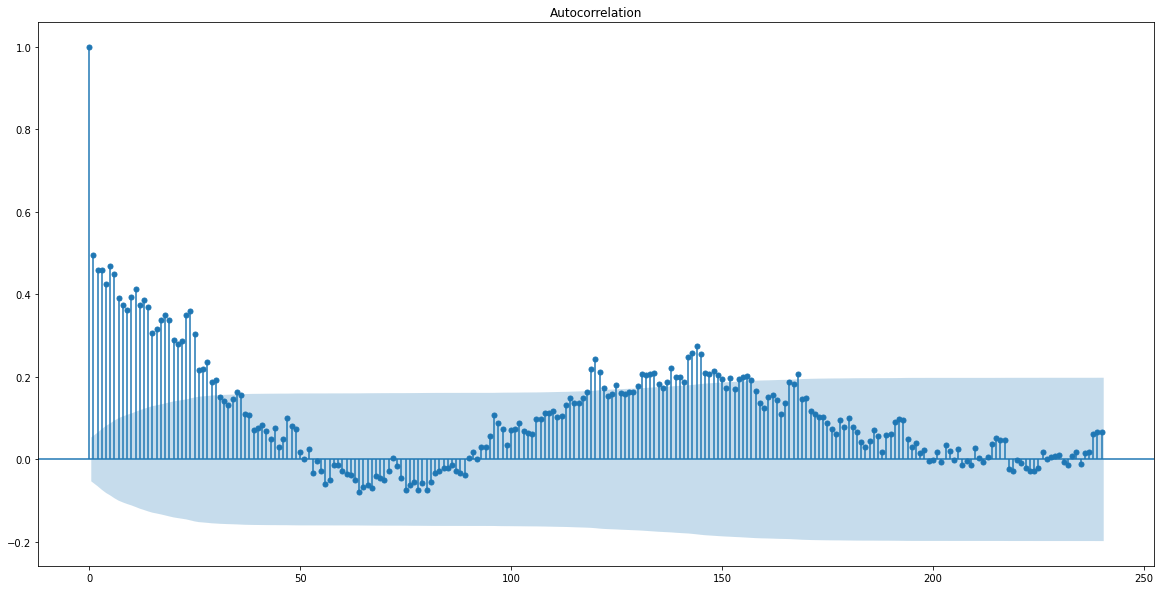

In [58]:
from statsmodels.graphics import tsaplots

plt.rc("figure", figsize=(20,10))
plt.figure(figsize=(16,8))
tsaplots.plot_acf(spikesf,lags=240)

plt.show()